In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('data\stud.csv')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Kulde\AppData\Local\Temp\ipykernel_4816\3075939955.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data\stud.csv')


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
print(df.duplicated().sum())


0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("categories in gender column : ", end="   " )
print(df['gender'].unique())

print("categories in race_ethnicity column : " ,  end="   ")
print(df['race_ethnicity'].unique())

print("categories in parental_level_of_education column : " ,  end="   ")
print(df['parental_level_of_education'].unique())

print("categories in lunch column : "  , end="   ")
print(df['lunch'].unique())

print("categories in test_preparation_course column : "  , end="   ")
print(df['test_preparation_course'].unique())

categories in gender column :    ['female' 'male']
categories in race_ethnicity column :    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education column :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch column :    ['standard' 'free/reduced']
categories in test_preparation_course column :    ['none' 'completed']


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(numerical_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total_score'] / 3


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:

max_math = df[df['math_score']==100]['average'].count()
print("max marks obtanied by", max_math, "students in math")

max_reading = df[df['reading_score']==100]['average'].count()
print("max marks obtanied by", max_reading, "students in reading")

max_writing = df[df['writing_score']==100]['average'].count()
print("max marks obtanied by", max_writing, "students in writing")

print("-----------------------------------------------")

less_math = df[df['math_score'] <=20]['average'].count()
print("less marks obtanied by", less_math, "students in math")

less_reading = df[df['reading_score'] <= 20]['average'].count()
print("less marks obtanied by", less_reading, "students in reading")

less_writing = df[df['writing_score'] <=20 ]['average'].count()
print("less marks obtanied by", less_writing, "students in writing")





max marks obtanied by 7 students in math
max marks obtanied by 17 students in reading
max marks obtanied by 14 students in writing
-----------------------------------------------
less marks obtanied by 4 students in math
less marks obtanied by 1 students in reading
less marks obtanied by 3 students in writing


<Axes: xlabel='average', ylabel='Count'>

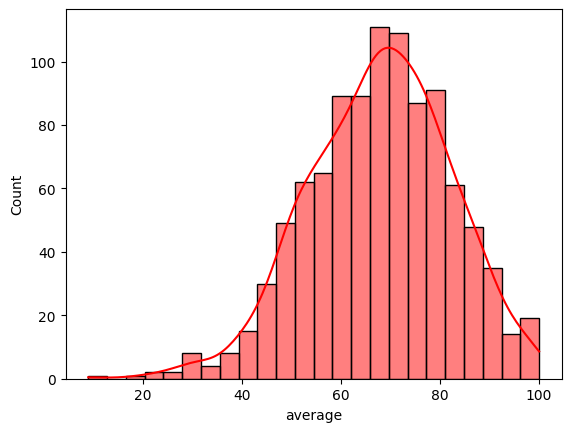

In [16]:
sns.histplot(data=df, x=df['average'], kde=True , color='r')


<Axes: xlabel='average', ylabel='Count'>

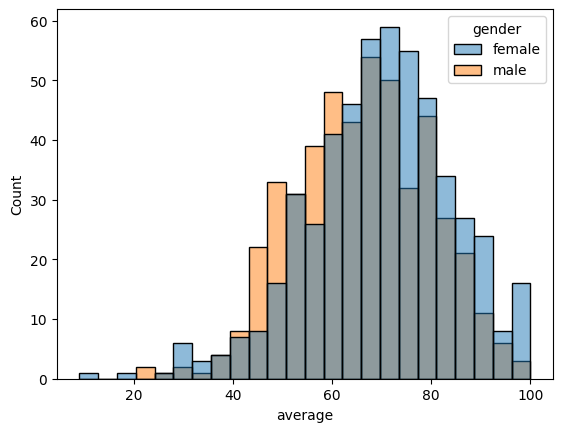

In [17]:
sns.histplot(data=df, x=df['average'], hue=df['gender'])


<Axes: xlabel='average', ylabel='Count'>

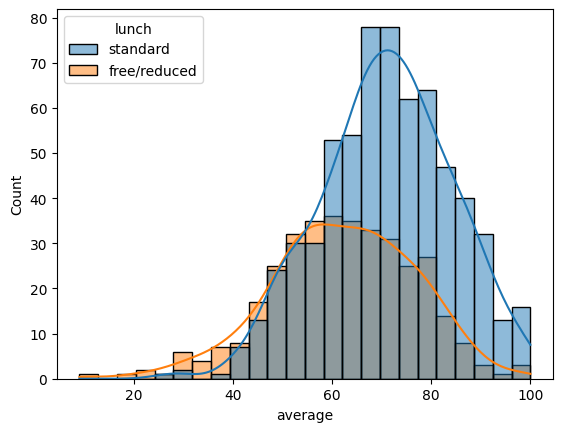

In [18]:
sns.histplot(data=df, x=df['average'], kde=True ,hue=df['lunch'])

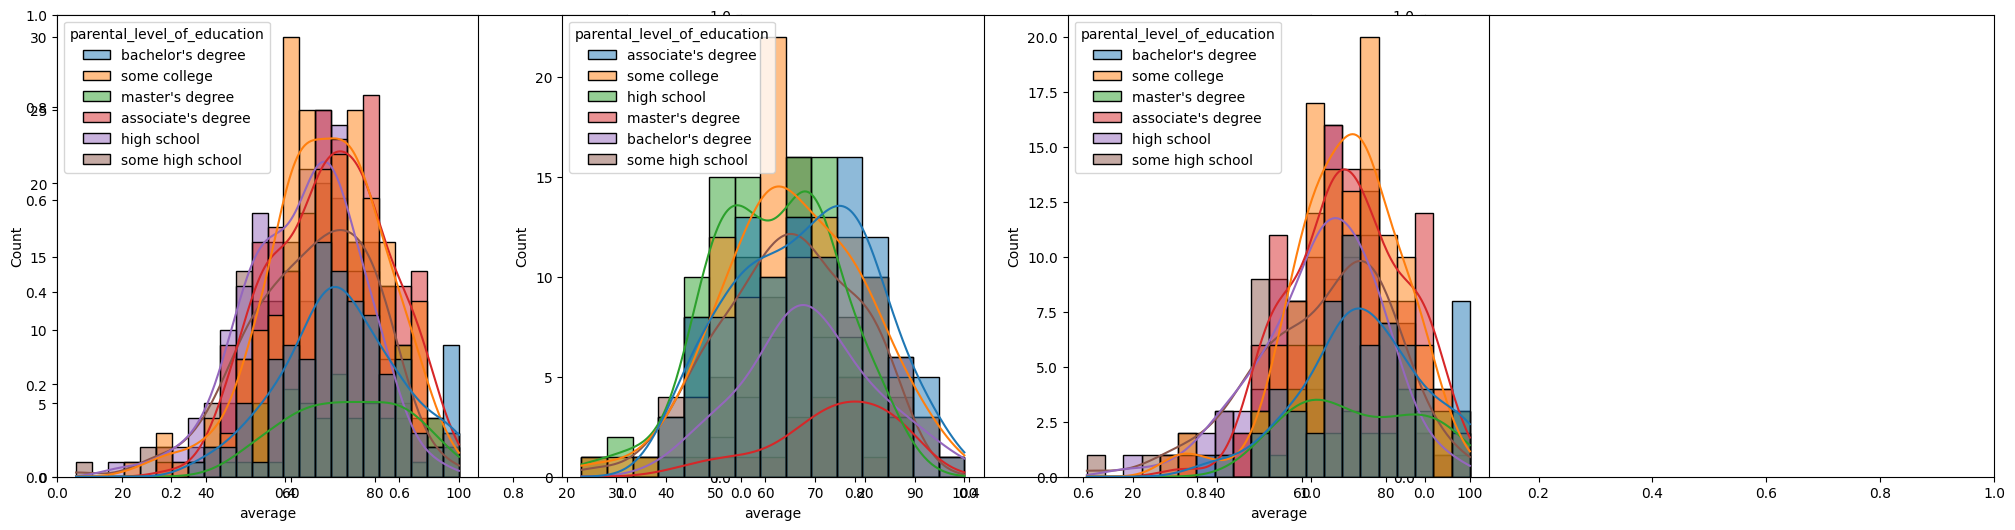

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [21]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

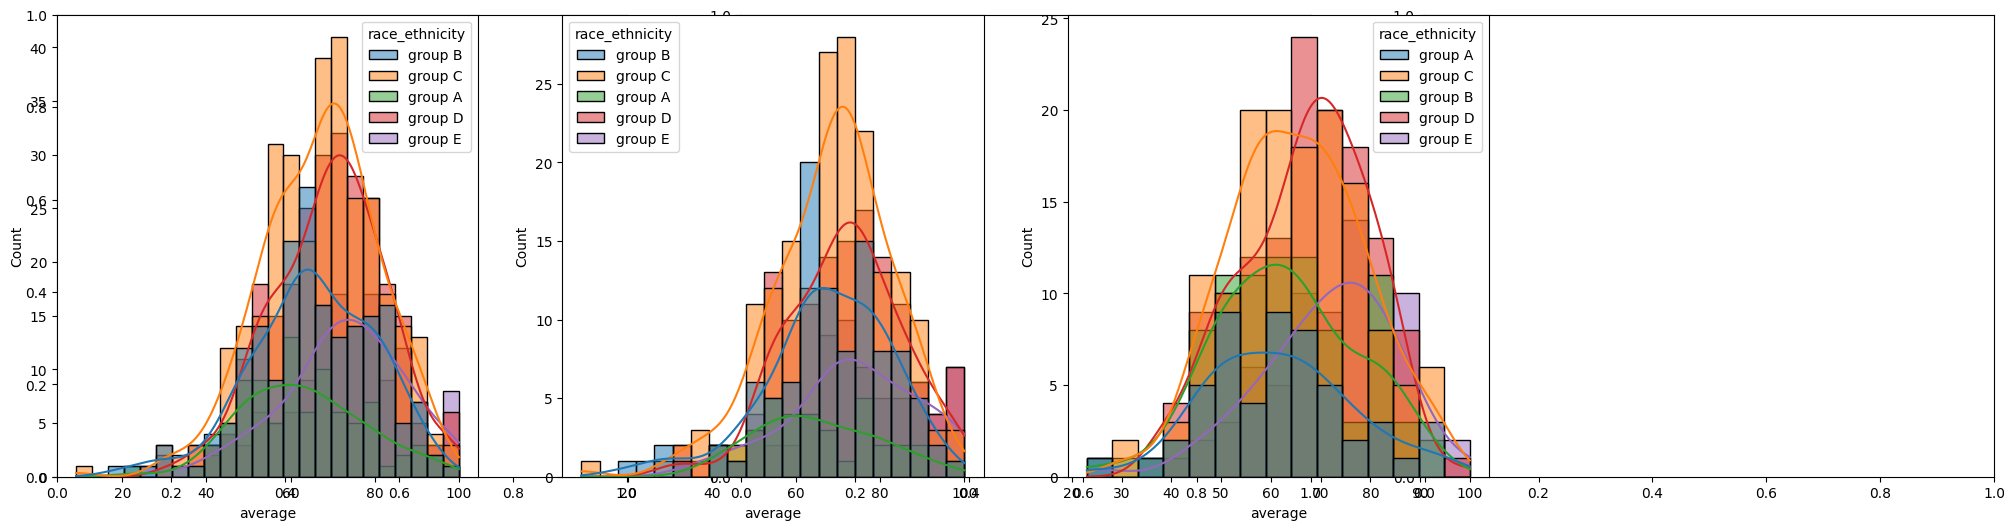

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

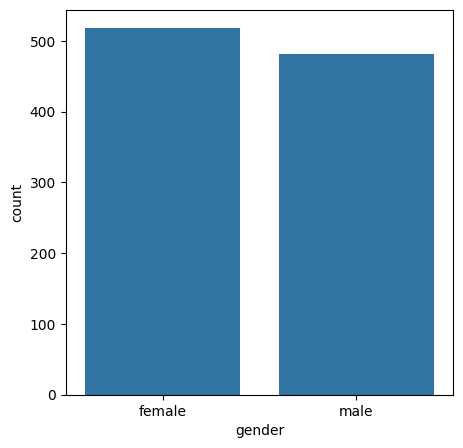

In [41]:
f,ax=plt.subplots(figsize=(5,5))
# plt.hist(x=df['gender'])

sns.countplot(x=df['gender'])

C:\Users\Kulde\AppData\Local\Temp\ipykernel_4816\2189631180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


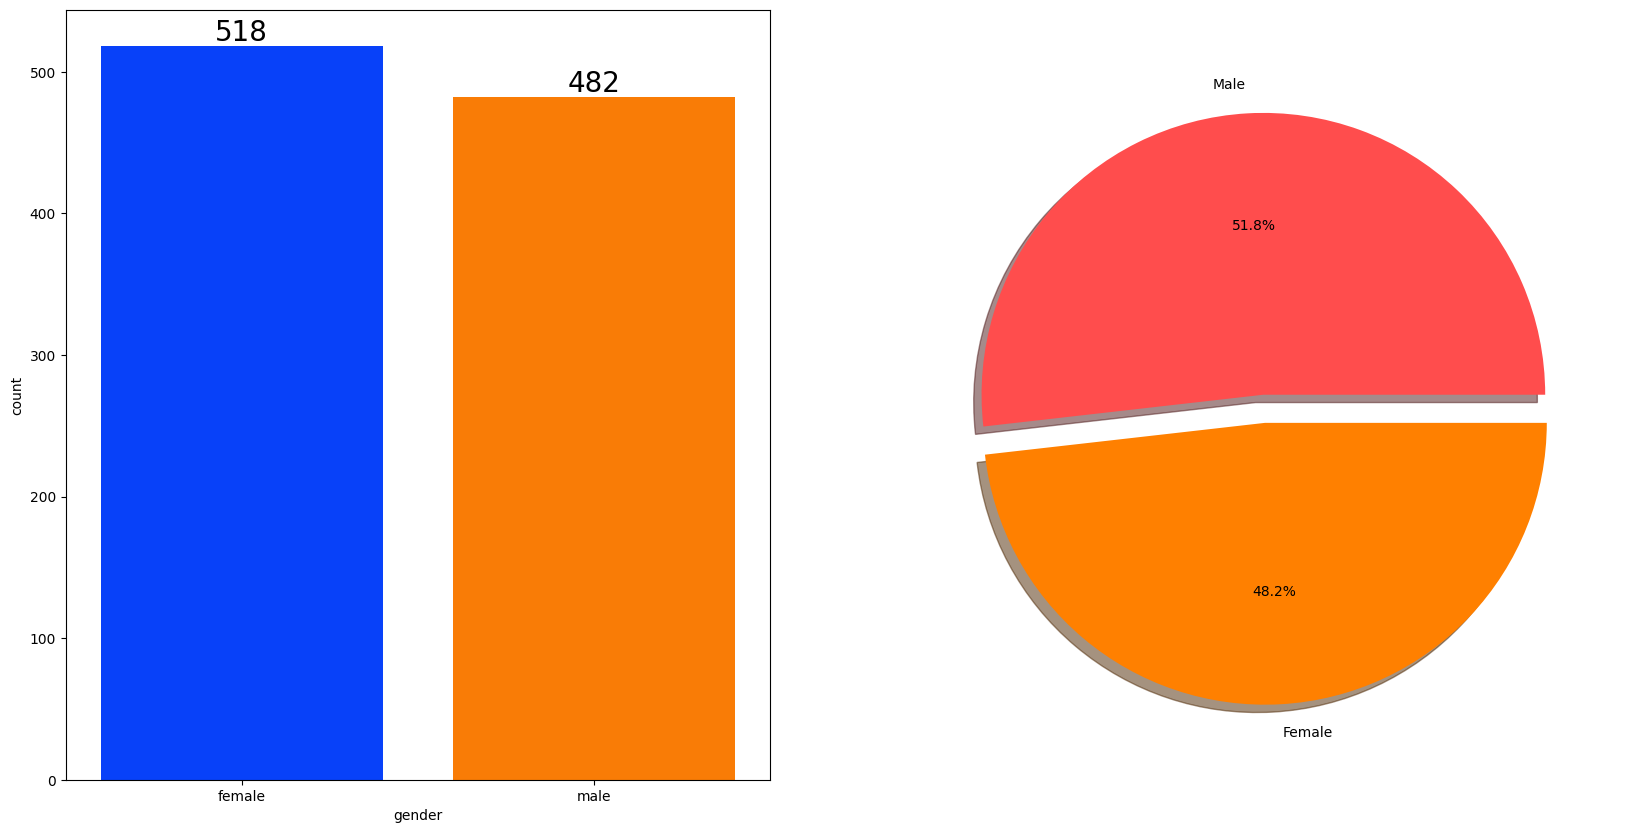

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

<Axes: xlabel='race_ethnicity', ylabel='average'>

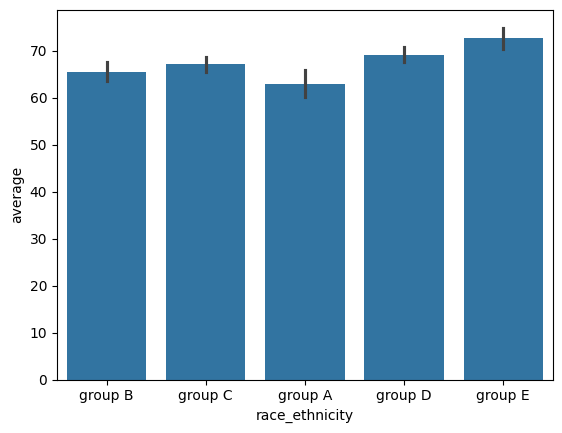

In [45]:
sns.barplot(x=df['race_ethnicity'],y=df['average'])

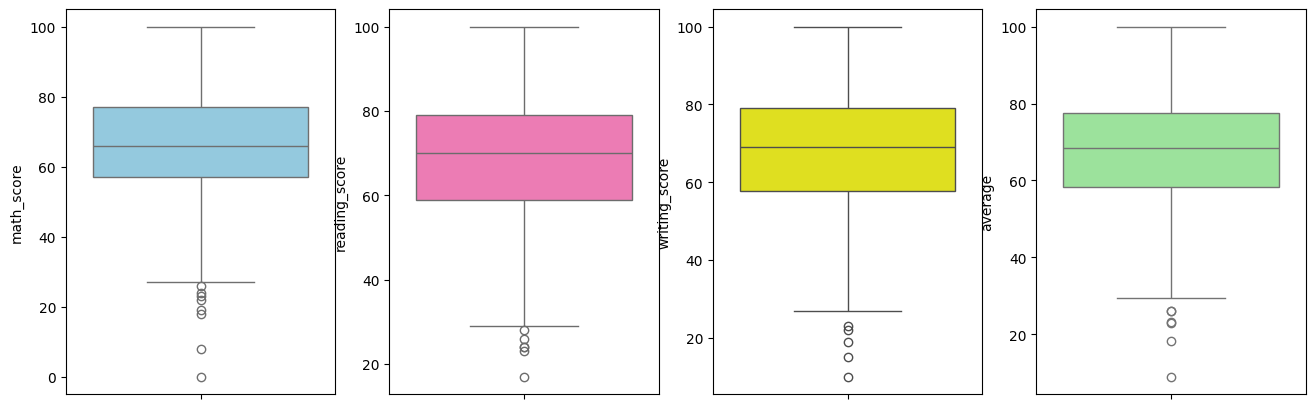

In [47]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

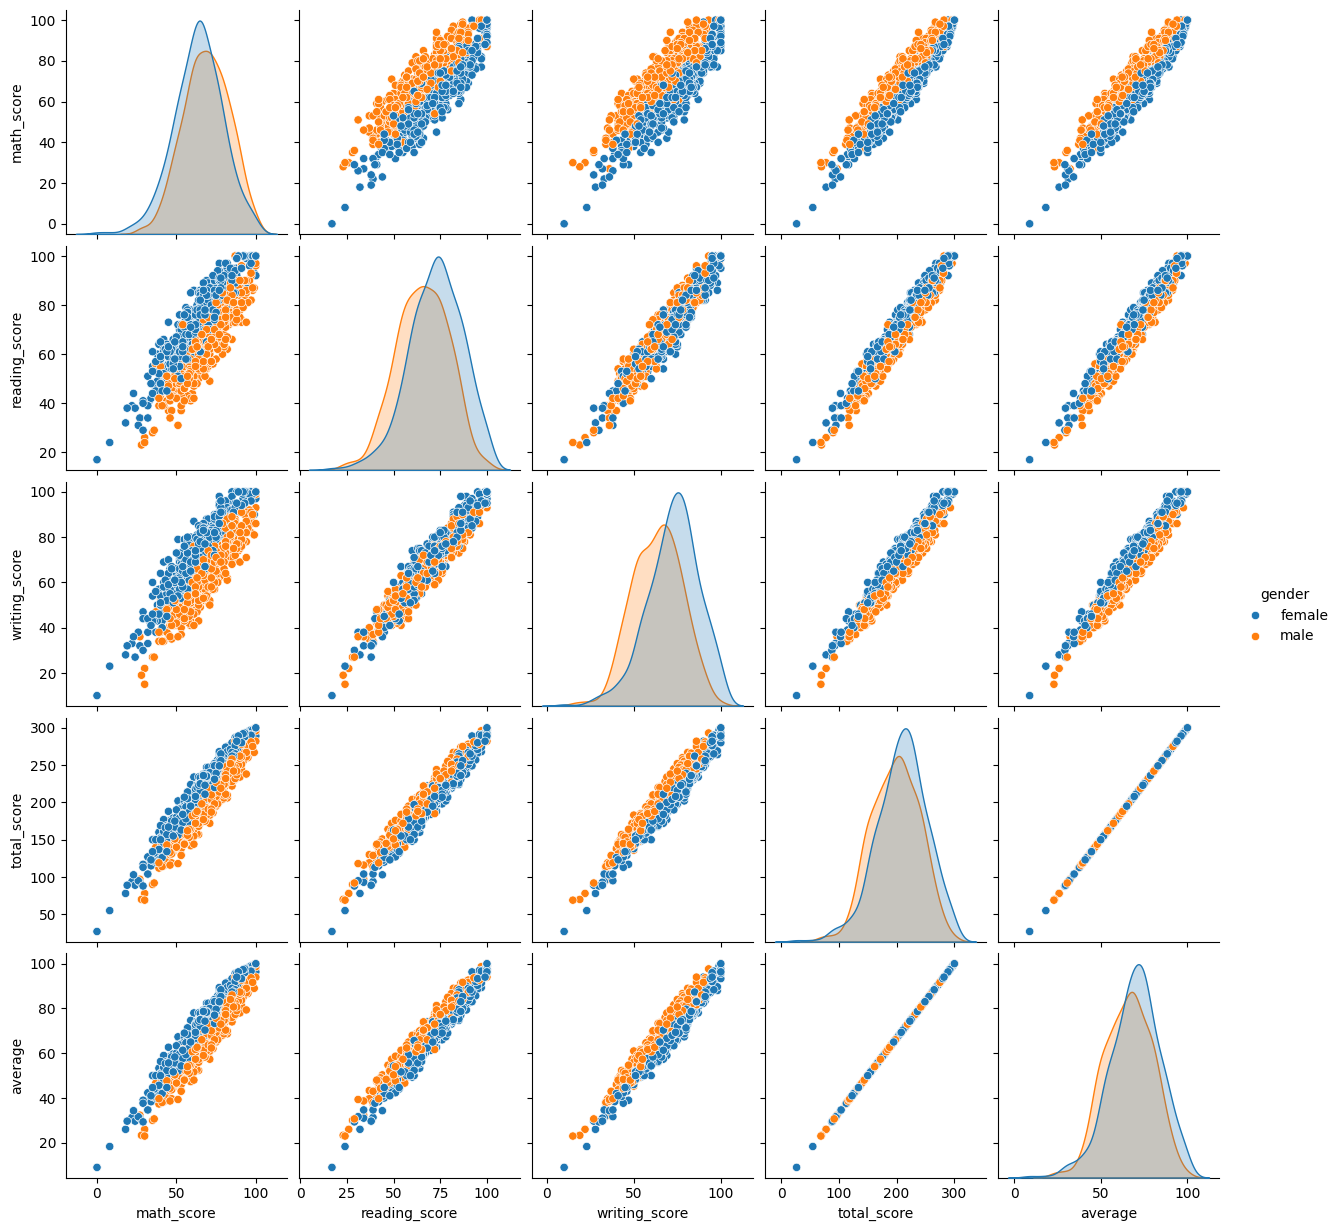

In [48]:
sns.pairplot(df,hue = 'gender')
plt.show()